## Basic Circular Barplot with Python
I haven't used `pandas`, `numpy` and `matplotlib` for a while, hence for this exercise I decided to follow a tutorial to create a simple visualization using all the tools to review the useful funcionality they offer when it comes to data analysis and visulaization. I found a great website, www.python-graph-gallery.com, containing different examples of visualizations that can be created with Python. I selected a circular barplot and followed the tutorial https://www.python-graph-gallery.com/circular-barplot-basic.

In [2]:
import matplotlib.pyplot as plt

To create a circular barplot, we need to access poral coordinates. As the author explains, it can be done by using the `polar` parameter of the `subplot()` function of matplotlib.

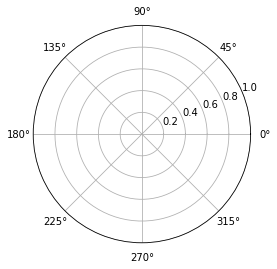

In [19]:
# Initialize plot with polar coordinates.
plt.subplot(111, polar=True);

To add bars to our graph, we need to use `bar()` function.

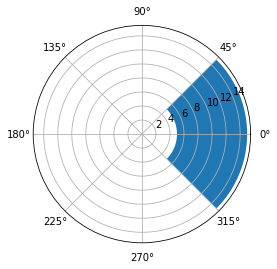

In [4]:
# import numpy to get the value of Pi
import numpy as np

# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
plt.bar(x=0, height=10, width=np.pi/2, bottom=5);

To build an actual circular barplot, we need data. We can generate some random values for the exercise. To do so, the author imports `pandas` and generates 50 random values.

In [12]:
import pandas as pd

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
df.head(50)

,Name,Value
0,item 1,71
1,item 2,19
2,item 3,47
3,item 4,11
4,item 5,73
5,item 6,30
6,item 7,90
7,item 8,82
8,item 9,64
9,item 10,39


Now we can use the data to build a basic circular barplot where each item will be represented as a bar.

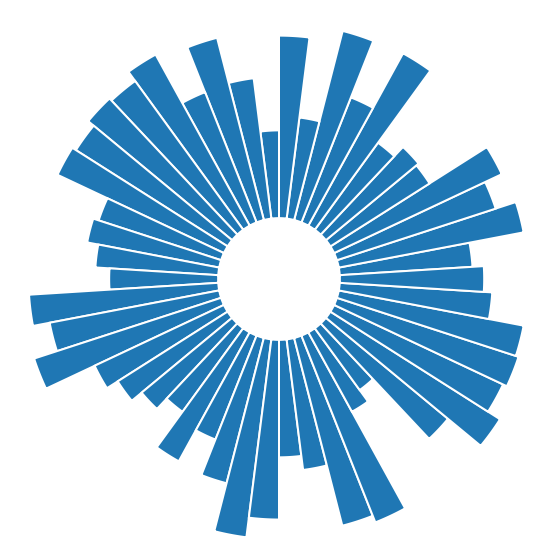

In [7]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

Using the random data, we generated a circular barplot where each bar represents a different item from the data set. However, without the lables the graph doesn't have a lot of meaning. Hence the following code, generates the labels for each bar.

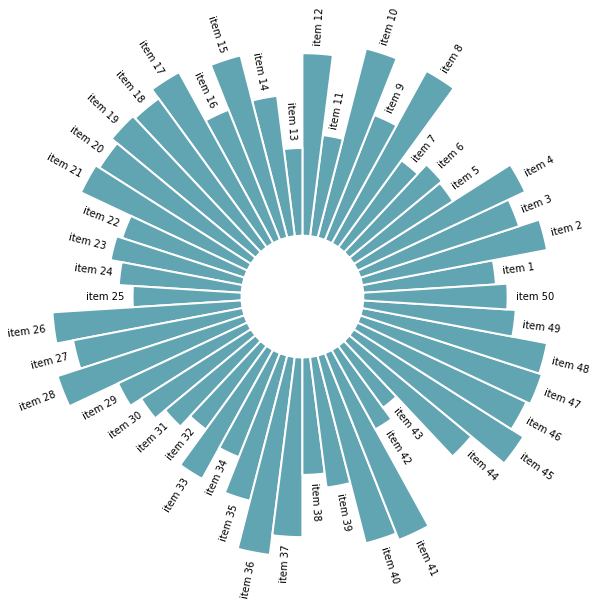

In [13]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

Finally, to improve the visibility of the graph, the author shows how to modify the code to order the items by size - it is accomplished by adding `sort_values()` that sorts data by values before creating the figure.

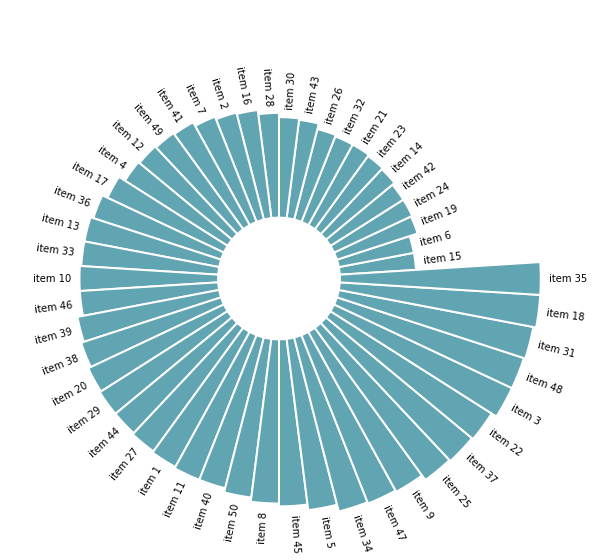

In [16]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 